# Real Hardware Fitting

In [1]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from cost_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
#np.set_printoptions(threshold=sys.maxsize)

## Density Matrix

### Two Qubits, Santiago

In [81]:
input_list, target_list = pickle.load(open("../../data/hsc_single.p", "rb"))

n = 2
d = 2**n
rank = 4

circuit = qk.QuantumCircuit(n)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)

U = Operator(circuit).data

kraus_model = KrausMap(U, 0.9, d, rank)

model = ModelQuantumMap(q_map = kraus_model,
                         cost = state_density_loss,
                         input_list = input_list,
                         target_list = target_list,
                         lr = 0.05, 
                         h = 1e-3)

model.train(num_iter = 1000, 
            use_adam = True,
            N = 10)

  0%|          | 0/1000 [00:00<?, ?it/s]

0: fid: -0.961, c: 0.904
1: fid: -0.963, c: 0.909
2: fid: -0.965, c: 0.913
3: fid: -0.967, c: 0.916
4: fid: -0.968, c: 0.920
5: fid: -0.969, c: 0.923
6: fid: -0.970, c: 0.926
7: fid: -0.971, c: 0.929
8: fid: -0.972, c: 0.932
9: fid: -0.973, c: 0.935
10: fid: -0.973, c: 0.937
11: fid: -0.974, c: 0.939
12: fid: -0.974, c: 0.941
13: fid: -0.974, c: 0.942
14: fid: -0.975, c: 0.944
15: fid: -0.975, c: 0.945
16: fid: -0.975, c: 0.946
17: fid: -0.976, c: 0.946
18: fid: -0.976, c: 0.947
19: fid: -0.976, c: 0.947
20: fid: -0.976, c: 0.948
21: fid: -0.976, c: 0.948
22: fid: -0.977, c: 0.948
23: fid: -0.977, c: 0.948
24: fid: -0.977, c: 0.948
25: fid: -0.977, c: 0.948
26: fid: -0.977, c: 0.947
27: fid: -0.978, c: 0.947
28: fid: -0.978, c: 0.947
29: fid: -0.978, c: 0.946
30: fid: -0.978, c: 0.946
31: fid: -0.978, c: 0.945
32: fid: -0.979, c: 0.944
33: fid: -0.979, c: 0.944
34: fid: -0.979, c: 0.943
35: fid: -0.979, c: 0.942
36: fid: -0.979, c: 0.942
37: fid: -0.979, c: 0.941
38: fid: -0.980, c: 0.

308: fid: -0.990, c: 0.609
309: fid: -0.990, c: 0.604
310: fid: -0.990, c: 0.600
311: fid: -0.990, c: 0.597
312: fid: -0.990, c: 0.593
313: fid: -0.990, c: 0.591
314: fid: -0.990, c: 0.588
315: fid: -0.990, c: 0.586
316: fid: -0.991, c: 0.584
317: fid: -0.991, c: 0.581
318: fid: -0.990, c: 0.578
319: fid: -0.990, c: 0.576
320: fid: -0.990, c: 0.574
321: fid: -0.990, c: 0.571
322: fid: -0.990, c: 0.568
323: fid: -0.991, c: 0.566
324: fid: -0.991, c: 0.563
325: fid: -0.991, c: 0.560
326: fid: -0.991, c: 0.557
327: fid: -0.991, c: 0.554
328: fid: -0.991, c: 0.550
329: fid: -0.990, c: 0.547
330: fid: -0.990, c: 0.543
331: fid: -0.991, c: 0.540
332: fid: -0.991, c: 0.537
333: fid: -0.991, c: 0.533
334: fid: -0.991, c: 0.530
335: fid: -0.991, c: 0.527
336: fid: -0.991, c: 0.525
337: fid: -0.991, c: 0.522
338: fid: -0.991, c: 0.520
339: fid: -0.991, c: 0.519
340: fid: -0.991, c: 0.517
341: fid: -0.991, c: 0.516
342: fid: -0.991, c: 0.514
343: fid: -0.991, c: 0.512
344: fid: -0.991, c: 0.510
3

612: fid: -0.992, c: 0.337
613: fid: -0.992, c: 0.336
614: fid: -0.992, c: 0.335
615: fid: -0.992, c: 0.334
616: fid: -0.992, c: 0.334
617: fid: -0.992, c: 0.333
618: fid: -0.992, c: 0.333
619: fid: -0.992, c: 0.333
620: fid: -0.992, c: 0.332
621: fid: -0.992, c: 0.332
622: fid: -0.992, c: 0.332
623: fid: -0.992, c: 0.332
624: fid: -0.992, c: 0.333
625: fid: -0.992, c: 0.333
626: fid: -0.992, c: 0.333
627: fid: -0.992, c: 0.333
628: fid: -0.991, c: 0.334
629: fid: -0.991, c: 0.334
630: fid: -0.991, c: 0.335
631: fid: -0.991, c: 0.335
632: fid: -0.991, c: 0.335
633: fid: -0.991, c: 0.335
634: fid: -0.992, c: 0.335
635: fid: -0.992, c: 0.335
636: fid: -0.992, c: 0.334
637: fid: -0.992, c: 0.333
638: fid: -0.992, c: 0.332
639: fid: -0.992, c: 0.331
640: fid: -0.992, c: 0.330
641: fid: -0.992, c: 0.329
642: fid: -0.992, c: 0.328
643: fid: -0.992, c: 0.326
644: fid: -0.992, c: 0.325
645: fid: -0.992, c: 0.324
646: fid: -0.992, c: 0.324
647: fid: -0.992, c: 0.324
648: fid: -0.992, c: 0.324
6

916: fid: -0.992, c: 0.288
917: fid: -0.992, c: 0.289
918: fid: -0.992, c: 0.289
919: fid: -0.992, c: 0.291
920: fid: -0.992, c: 0.291
921: fid: -0.992, c: 0.292
922: fid: -0.992, c: 0.292
923: fid: -0.992, c: 0.292
924: fid: -0.992, c: 0.293
925: fid: -0.992, c: 0.293
926: fid: -0.992, c: 0.292
927: fid: -0.992, c: 0.292
928: fid: -0.992, c: 0.292
929: fid: -0.992, c: 0.292
930: fid: -0.992, c: 0.292
931: fid: -0.992, c: 0.292
932: fid: -0.992, c: 0.292
933: fid: -0.992, c: 0.292
934: fid: -0.992, c: 0.292
935: fid: -0.992, c: 0.292
936: fid: -0.992, c: 0.293
937: fid: -0.992, c: 0.293
938: fid: -0.992, c: 0.293
939: fid: -0.992, c: 0.294
940: fid: -0.992, c: 0.294
941: fid: -0.992, c: 0.295
942: fid: -0.992, c: 0.295
943: fid: -0.992, c: 0.296
944: fid: -0.992, c: 0.295
945: fid: -0.992, c: 0.294
946: fid: -0.992, c: 0.293
947: fid: -0.992, c: 0.292
948: fid: -0.992, c: 0.290
949: fid: -0.992, c: 0.287
950: fid: -0.992, c: 0.285
951: fid: -0.992, c: 0.284
952: fid: -0.992, c: 0.283
9

In [82]:
input_state = pickle.load(open("../../data/hsc_single.p", "rb"))[0][0]
state_model = input_state
state_unitary = input_state
observ = input_state

expect_model_list = []
expect_target_list = []
expect_unitary_list = []

state_target_list = []
state_target_list.append(pickle.load(open("../../data/hsc_single.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_double.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_triple.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_quad.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_five.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_six.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_seven.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_nine.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_10.p", "rb"))[1][0])
state_target_list.append(pickle.load(open("../../data/hsc_11.p", "rb"))[1][0])



for i in range(7):
    state_model = kraus_model.apply_map(state_model)
    expect_model_list.append(expectation_value(state_model, observ))
    
    expect_target_list.append(expectation_value(state_target_list[i], observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    expect_unitary_list.append(expectation_value(state_unitary, observ))
    
    
state_model = kraus_model.apply_map(state_model)
    
    
for i in range(9,11):
    state_model = kraus_model.apply_map(state_model)
    expect_model_list.append(expectation_value(state_model, observ))
    
    expect_target_list.append(expectation_value(state_target_list[i-1], observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    expect_unitary_list.append(expectation_value(state_unitary, observ))


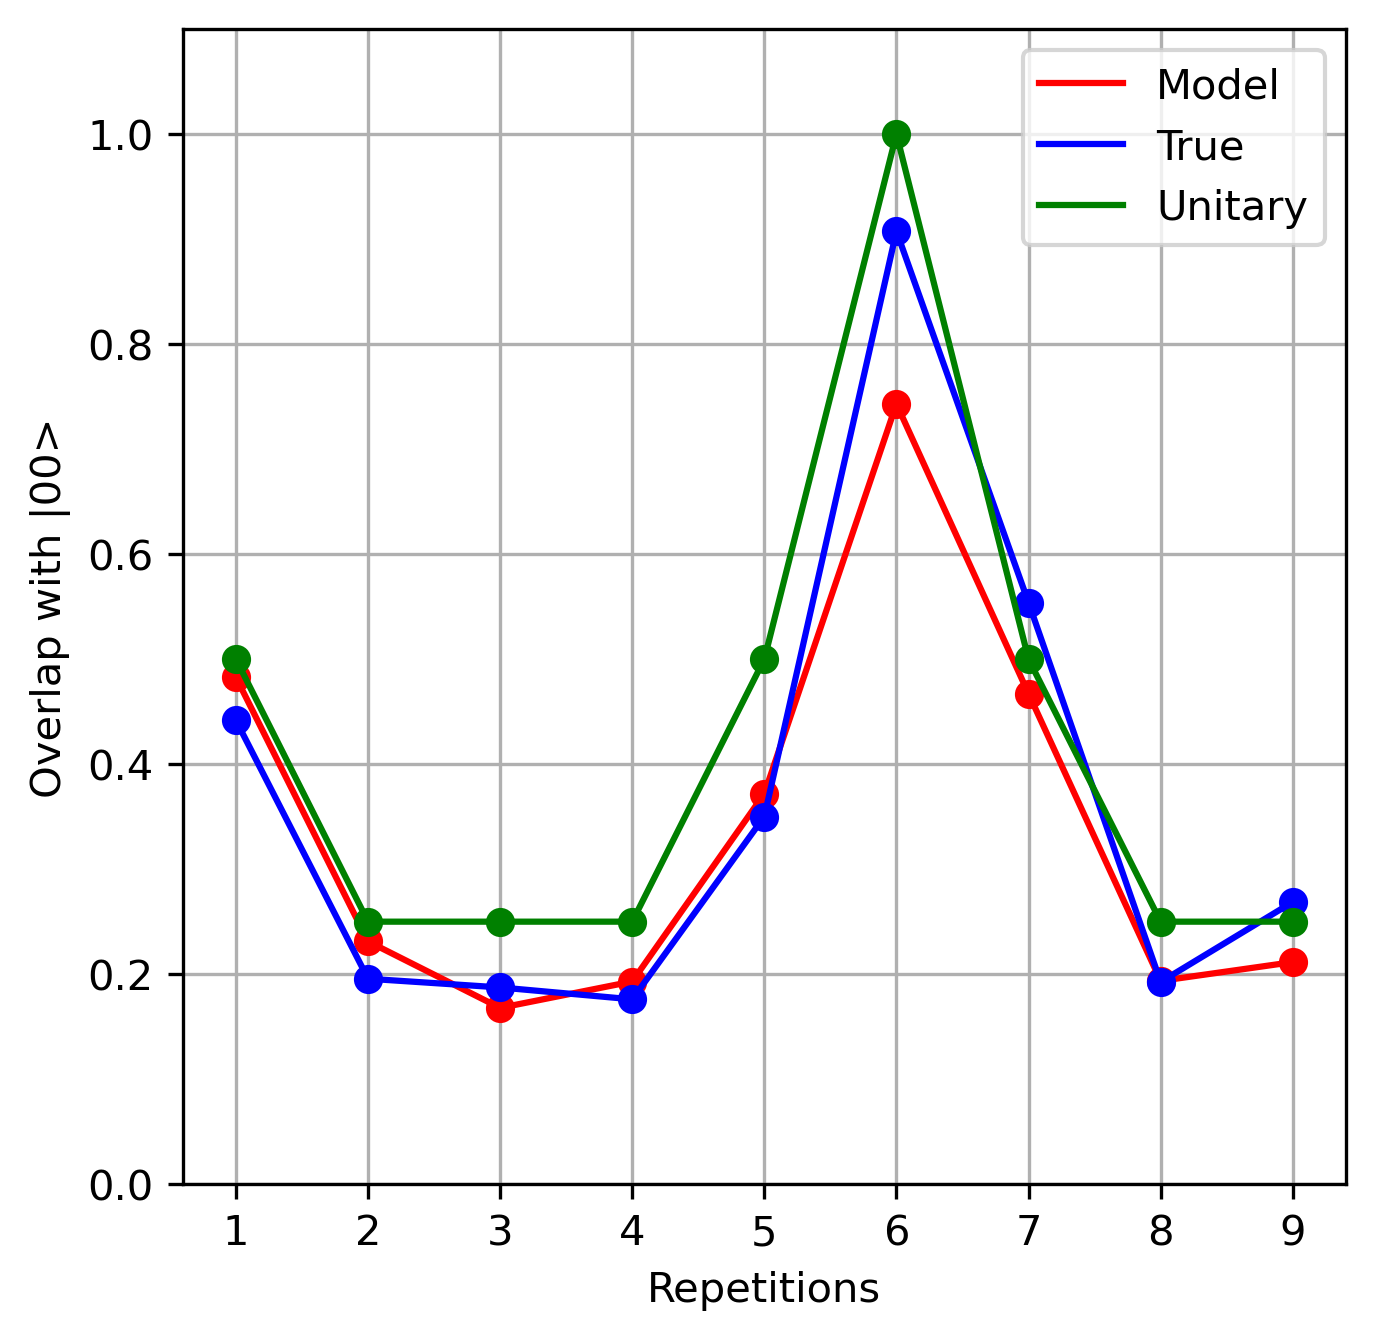

In [92]:
fig=plt.figure(figsize=(5,5), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,10))
plt.plot(x, expect_model_list, "ro")
plt.plot(x, expect_model_list, "r-", label="Model")
plt.plot(x, expect_target_list, "bo")
plt.plot(x, expect_target_list, "b-", label="True")
plt.plot(x, expect_unitary_list, "go")
plt.plot(x, expect_unitary_list, "g-", label="Unitary")
plt.legend()
plt.xlabel("Repetitions")
plt.ylabel("Overlap with |00>")
plt.ylim([0,1.1])
plt.grid()
plt.show()

## Expectation Value

### One Qubits, Manila

In [2]:
input_list, target_list = pickle.load(open("..\..\data\oneQubits_expectation.p", "rb"))
input_list, input_test = input_list[:18], input_list[18:]
target_list, target_test = target_list[:18], target_list[18:]

n = 1
d = 2**n
rank = 3

circuit = qk.QuantumCircuit(n)
circuit.h(0)
U = Operator(circuit).data

np.random.seed(42)
random.seed(42)

kraus_model = KrausMap(U=U, c=0.9, d=d, rank=rank)

model1 = ModelQuantumMap(q_map = kraus_model,
                        cost = expectation_value_loss,
                        input_list = input_list,
                        target_list = target_list,
                        lr = 0.05, 
                        h = 1e-3)

model1.train(num_iter = 1000, 
             use_adam = True,
             N = 18)

  0%|          | 0/1000 [00:00<?, ?it/s]

0: fid: 0.002, c: 0.904
1: fid: 0.001, c: 0.909
2: fid: 0.001, c: 0.912
3: fid: 0.001, c: 0.916
4: fid: 0.001, c: 0.919
5: fid: 0.001, c: 0.922
6: fid: 0.000, c: 0.924
7: fid: 0.000, c: 0.926
8: fid: 0.000, c: 0.927
9: fid: 0.000, c: 0.928
10: fid: 0.000, c: 0.929
11: fid: 0.000, c: 0.930
12: fid: 0.000, c: 0.930
13: fid: 0.000, c: 0.930
14: fid: 0.000, c: 0.929
15: fid: 0.000, c: 0.929
16: fid: 0.000, c: 0.928
17: fid: 0.000, c: 0.927
18: fid: 0.000, c: 0.927
19: fid: 0.000, c: 0.926
20: fid: 0.000, c: 0.925
21: fid: 0.000, c: 0.924
22: fid: 0.000, c: 0.923
23: fid: 0.000, c: 0.922
24: fid: 0.000, c: 0.922
25: fid: 0.000, c: 0.921
26: fid: 0.000, c: 0.921
27: fid: 0.000, c: 0.921
28: fid: 0.000, c: 0.921
29: fid: 0.000, c: 0.921
30: fid: 0.000, c: 0.922
31: fid: 0.000, c: 0.922
32: fid: 0.000, c: 0.922
33: fid: 0.000, c: 0.923
34: fid: 0.000, c: 0.923
35: fid: 0.000, c: 0.924
36: fid: 0.000, c: 0.924
37: fid: 0.000, c: 0.924
38: fid: 0.000, c: 0.924
39: fid: 0.000, c: 0.924
40: fid: 0

321: fid: 0.000, c: 0.921
322: fid: 0.000, c: 0.921
323: fid: 0.000, c: 0.921
324: fid: 0.000, c: 0.921
325: fid: 0.000, c: 0.921
326: fid: 0.000, c: 0.921
327: fid: 0.000, c: 0.921
328: fid: 0.000, c: 0.921
329: fid: 0.000, c: 0.921
330: fid: 0.000, c: 0.921
331: fid: 0.000, c: 0.921
332: fid: 0.000, c: 0.921
333: fid: 0.000, c: 0.921
334: fid: 0.000, c: 0.921
335: fid: 0.000, c: 0.921
336: fid: 0.000, c: 0.921
337: fid: 0.000, c: 0.921
338: fid: 0.000, c: 0.921
339: fid: 0.000, c: 0.921
340: fid: 0.000, c: 0.921
341: fid: 0.000, c: 0.921
342: fid: 0.000, c: 0.921
343: fid: 0.000, c: 0.921
344: fid: 0.000, c: 0.921
345: fid: 0.000, c: 0.921
346: fid: 0.000, c: 0.921
347: fid: 0.000, c: 0.921
348: fid: 0.000, c: 0.921
349: fid: 0.000, c: 0.921
350: fid: 0.000, c: 0.921
351: fid: 0.000, c: 0.921
352: fid: 0.000, c: 0.921
353: fid: 0.000, c: 0.921
354: fid: 0.000, c: 0.921
355: fid: 0.000, c: 0.921
356: fid: 0.000, c: 0.921
357: fid: 0.000, c: 0.921
358: fid: 0.000, c: 0.921
359: fid: 0.

637: fid: 0.000, c: 0.921
638: fid: 0.000, c: 0.921
639: fid: 0.000, c: 0.921
640: fid: 0.000, c: 0.921
641: fid: 0.000, c: 0.921
642: fid: 0.000, c: 0.921
643: fid: 0.000, c: 0.921
644: fid: 0.000, c: 0.921
645: fid: 0.000, c: 0.921
646: fid: 0.000, c: 0.921
647: fid: 0.000, c: 0.921
648: fid: 0.000, c: 0.921
649: fid: 0.000, c: 0.921
650: fid: 0.000, c: 0.921
651: fid: 0.000, c: 0.921
652: fid: 0.000, c: 0.921
653: fid: 0.000, c: 0.921
654: fid: 0.000, c: 0.921
655: fid: 0.000, c: 0.921
656: fid: 0.000, c: 0.921
657: fid: 0.000, c: 0.921
658: fid: 0.000, c: 0.921
659: fid: 0.000, c: 0.921
660: fid: 0.000, c: 0.921
661: fid: 0.000, c: 0.921
662: fid: 0.000, c: 0.921
663: fid: 0.000, c: 0.921
664: fid: 0.000, c: 0.921
665: fid: 0.000, c: 0.921
666: fid: 0.000, c: 0.921
667: fid: 0.000, c: 0.921
668: fid: 0.000, c: 0.921
669: fid: 0.000, c: 0.921
670: fid: 0.000, c: 0.921
671: fid: 0.000, c: 0.921
672: fid: 0.000, c: 0.921
673: fid: 0.000, c: 0.921
674: fid: 0.000, c: 0.921
675: fid: 0.

953: fid: 0.000, c: 0.921
954: fid: 0.000, c: 0.921
955: fid: 0.000, c: 0.921
956: fid: 0.000, c: 0.921
957: fid: 0.000, c: 0.921
958: fid: 0.000, c: 0.921
959: fid: 0.000, c: 0.921
960: fid: 0.000, c: 0.921
961: fid: 0.000, c: 0.921
962: fid: 0.000, c: 0.921
963: fid: 0.000, c: 0.921
964: fid: 0.000, c: 0.921
965: fid: 0.000, c: 0.921
966: fid: 0.000, c: 0.921
967: fid: 0.000, c: 0.921
968: fid: 0.000, c: 0.921
969: fid: 0.000, c: 0.921
970: fid: 0.000, c: 0.921
971: fid: 0.000, c: 0.921
972: fid: 0.000, c: 0.921
973: fid: 0.000, c: 0.921
974: fid: 0.000, c: 0.921
975: fid: 0.000, c: 0.921
976: fid: 0.000, c: 0.921
977: fid: 0.000, c: 0.921
978: fid: 0.000, c: 0.921
979: fid: 0.000, c: 0.921
980: fid: 0.000, c: 0.921
981: fid: 0.000, c: 0.921
982: fid: 0.000, c: 0.921
983: fid: 0.000, c: 0.921
984: fid: 0.000, c: 0.921
985: fid: 0.000, c: 0.921
986: fid: 0.000, c: 0.921
987: fid: 0.000, c: 0.921
988: fid: 0.000, c: 0.921
989: fid: 0.000, c: 0.921
990: fid: 0.000, c: 0.921
991: fid: 0.

In [5]:
circuit = qk.QuantumCircuit(n)
circuit.h(0)
U = Operator(circuit).data

state_unitary = state_model = observ = np.array([[1, 0], [0, 0]])
model_expectation_list = []
unitary_expectation_list = []

for i in range(20):
    state_model = model1.q_map.apply_map(state_model)
    model_expectation_list.append(expectation_value(state_model, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(state_unitary, observ))

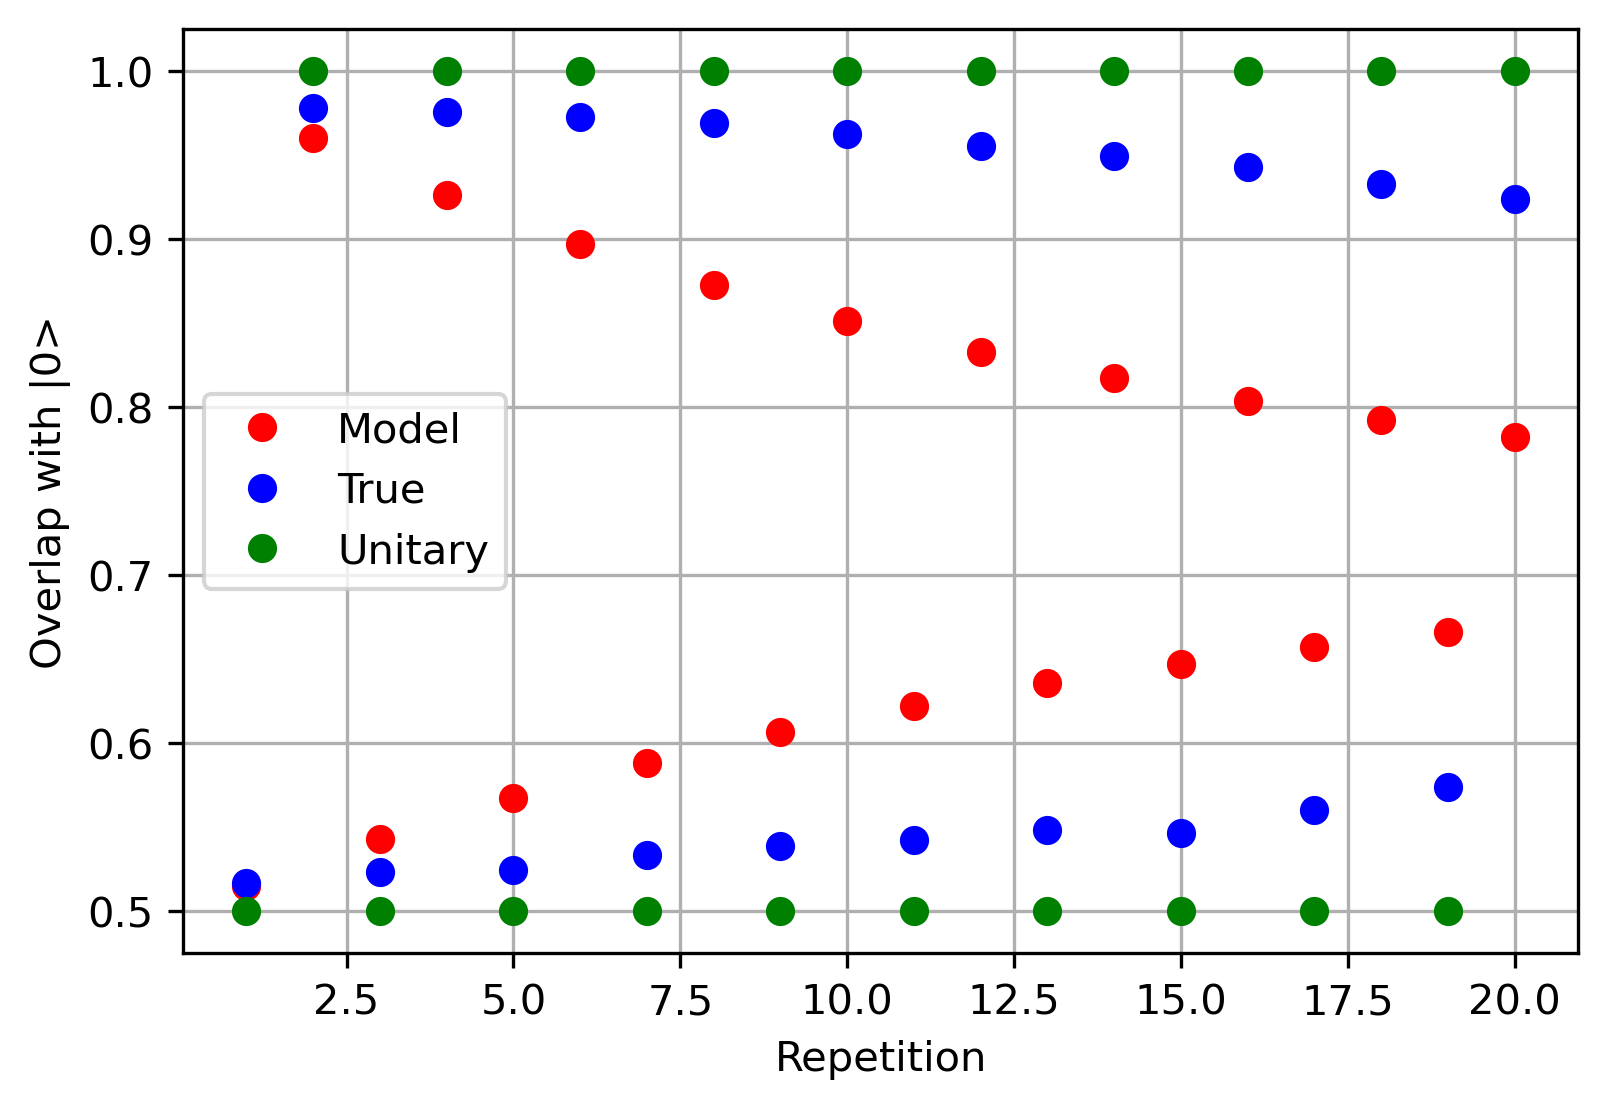

In [6]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, model_expectation_list, "ro", label="Model")
plt.plot(x, target_test, "bo", label="True")
plt.plot(x, unitary_expectation_list, "go", label="Unitary")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |0>")
plt.legend()
plt.grid()
plt.show()

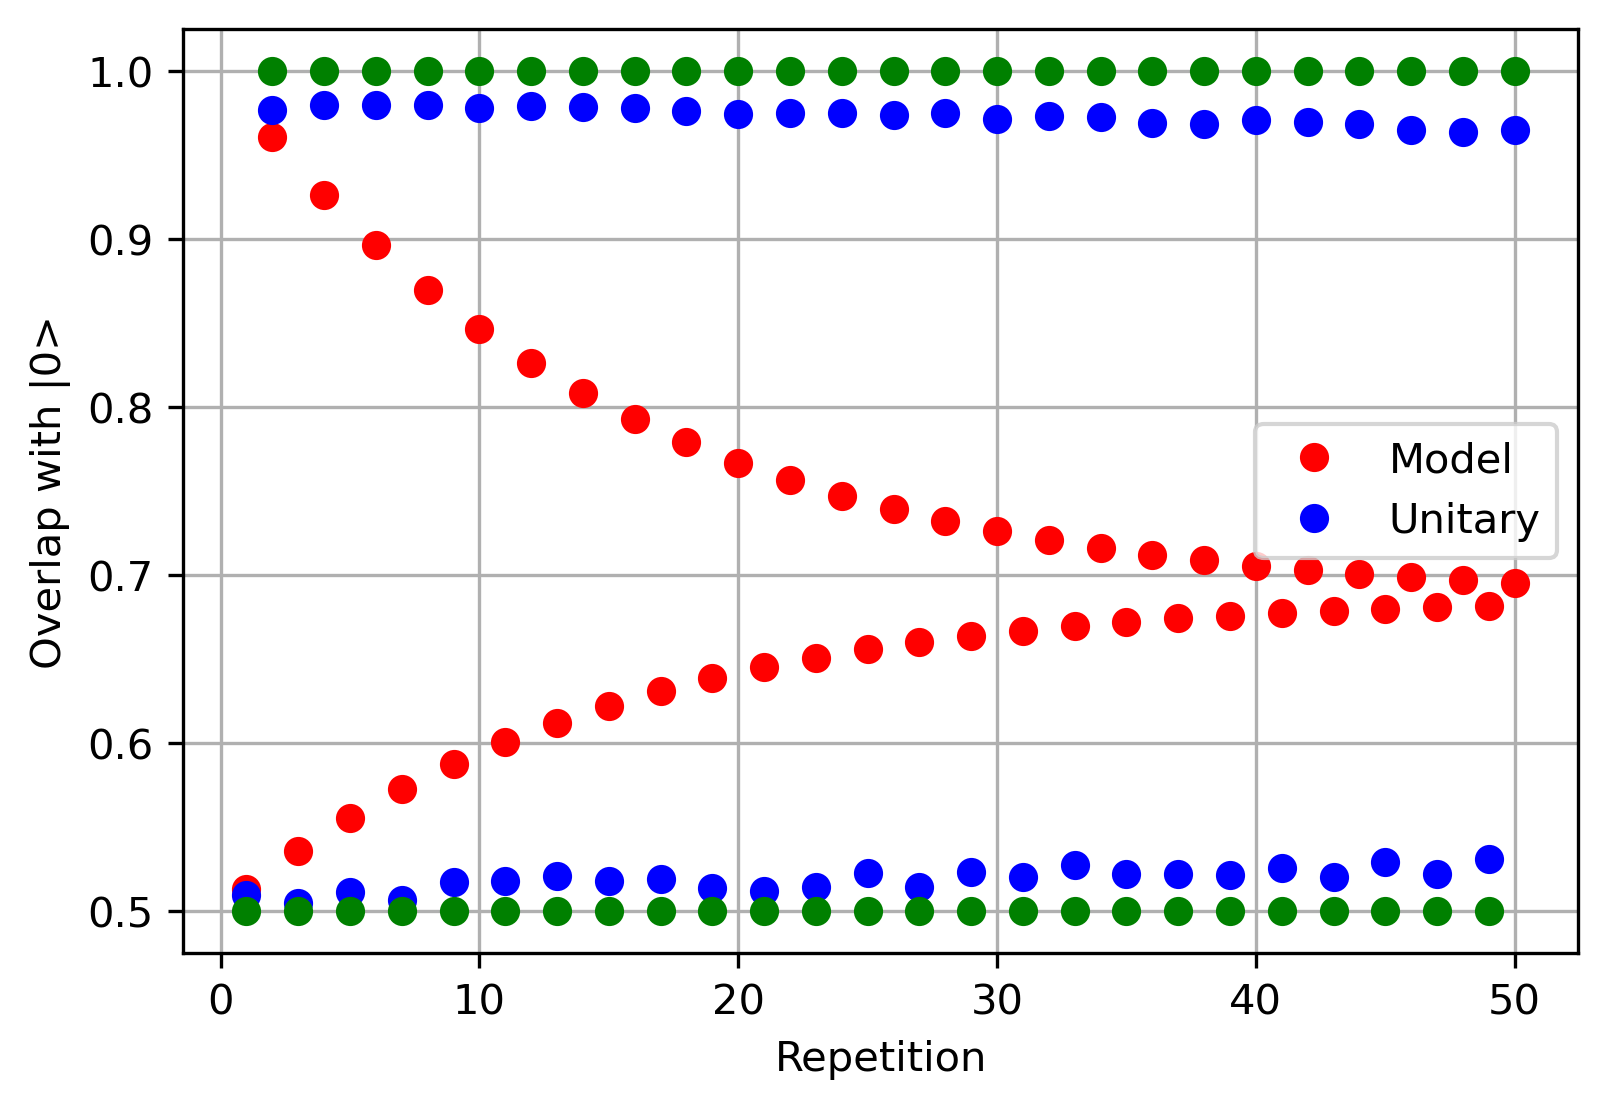

In [213]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,51))
plt.plot(x, model_expectation_list, "ro", label="Model")
plt.plot(x, target_test, "bo", label="True")
plt.plot(x, unitary_expectation_list, "go", label="Unitary")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |0>")
plt.legend(["Model", "Unitary"])
plt.grid()
plt.show()

## Two Qubits

In [19]:
input_list, target_list = pickle.load(open("..\..\data\twoQubits_expectation_400.p", "rb"))
input_list, input_test = input_list[:380], input_list[380:]
target_list, target_test = target_list[:380], target_list[380:]

input_val_list, target_val_list = pickle.load(open("..\..\data\twoQubits_expectation_380_540.p", "rb"))

input_list.extend(input_val_list[:100])
target_list.extend(target_val_list[:100])

input_val_list = input_val_list[100:]
target_val_list = target_val_list[100:]

print(len(input_val_list))


n = 2
d = 2**n
rank = d**2-1

np.random.seed(42)
random.seed(42)

circuit = qk.QuantumCircuit(n)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)
circuit.h(0)
circuit.s(1)
circuit.cnot(0,1)
U = Operator(circuit).data

kraus_model = KrausMap(U=U, c = 0.9, d=d, rank=rank)

model2 = ModelQuantumMap(q_map = kraus_model,
                         cost = expectation_value_loss,
                         input_list = input_list,
                         target_list = target_list,
                         input_val_list = input_val_list,
                         target_val_list = target_val_list,
                         lr = 0.05, 
                         h = 1e-3)

model2.train(num_iter = 1000, 
             use_adam = True,
             N = 20)

60


  0%|          | 0/1000 [00:00<?, ?it/s]

0: fid: 0.00333, c: 0.895
1: fid: 0.00325, c: 0.891
2: fid: 0.00320, c: 0.886
3: fid: 0.00315, c: 0.881
4: fid: 0.00313, c: 0.876
5: fid: 0.00312, c: 0.872
6: fid: 0.00311, c: 0.869
7: fid: 0.00309, c: 0.866
8: fid: 0.00309, c: 0.863
9: fid: 0.00307, c: 0.860
10: fid: 0.00306, c: 0.858
11: fid: 0.00302, c: 0.856
12: fid: 0.00299, c: 0.854
13: fid: 0.00297, c: 0.853
14: fid: 0.00294, c: 0.851
15: fid: 0.00291, c: 0.850
16: fid: 0.00288, c: 0.849
17: fid: 0.00286, c: 0.848
18: fid: 0.00284, c: 0.846
19: fid: 0.00281, c: 0.846
20: fid: 0.00279, c: 0.845
21: fid: 0.00277, c: 0.844
22: fid: 0.00273, c: 0.845
23: fid: 0.00271, c: 0.844
24: fid: 0.00268, c: 0.844
25: fid: 0.00264, c: 0.845
26: fid: 0.00260, c: 0.847
27: fid: 0.00256, c: 0.848
28: fid: 0.00253, c: 0.849
29: fid: 0.00251, c: 0.849
30: fid: 0.00248, c: 0.849
31: fid: 0.00246, c: 0.849
32: fid: 0.00243, c: 0.847
33: fid: 0.00241, c: 0.845
34: fid: 0.00240, c: 0.844
35: fid: 0.00239, c: 0.842
36: fid: 0.00238, c: 0.840
37: fid: 0.

KeyboardInterrupt: 

In [20]:
state_unitary = state_model = observ = np.array([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
model_expectation_list = []
unitary_expectation_list = []

for i in range(20):
    state_model = model2.q_map.apply_map(state_model)
    model_expectation_list.append(expectation_value(state_model, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(state_unitary, observ))

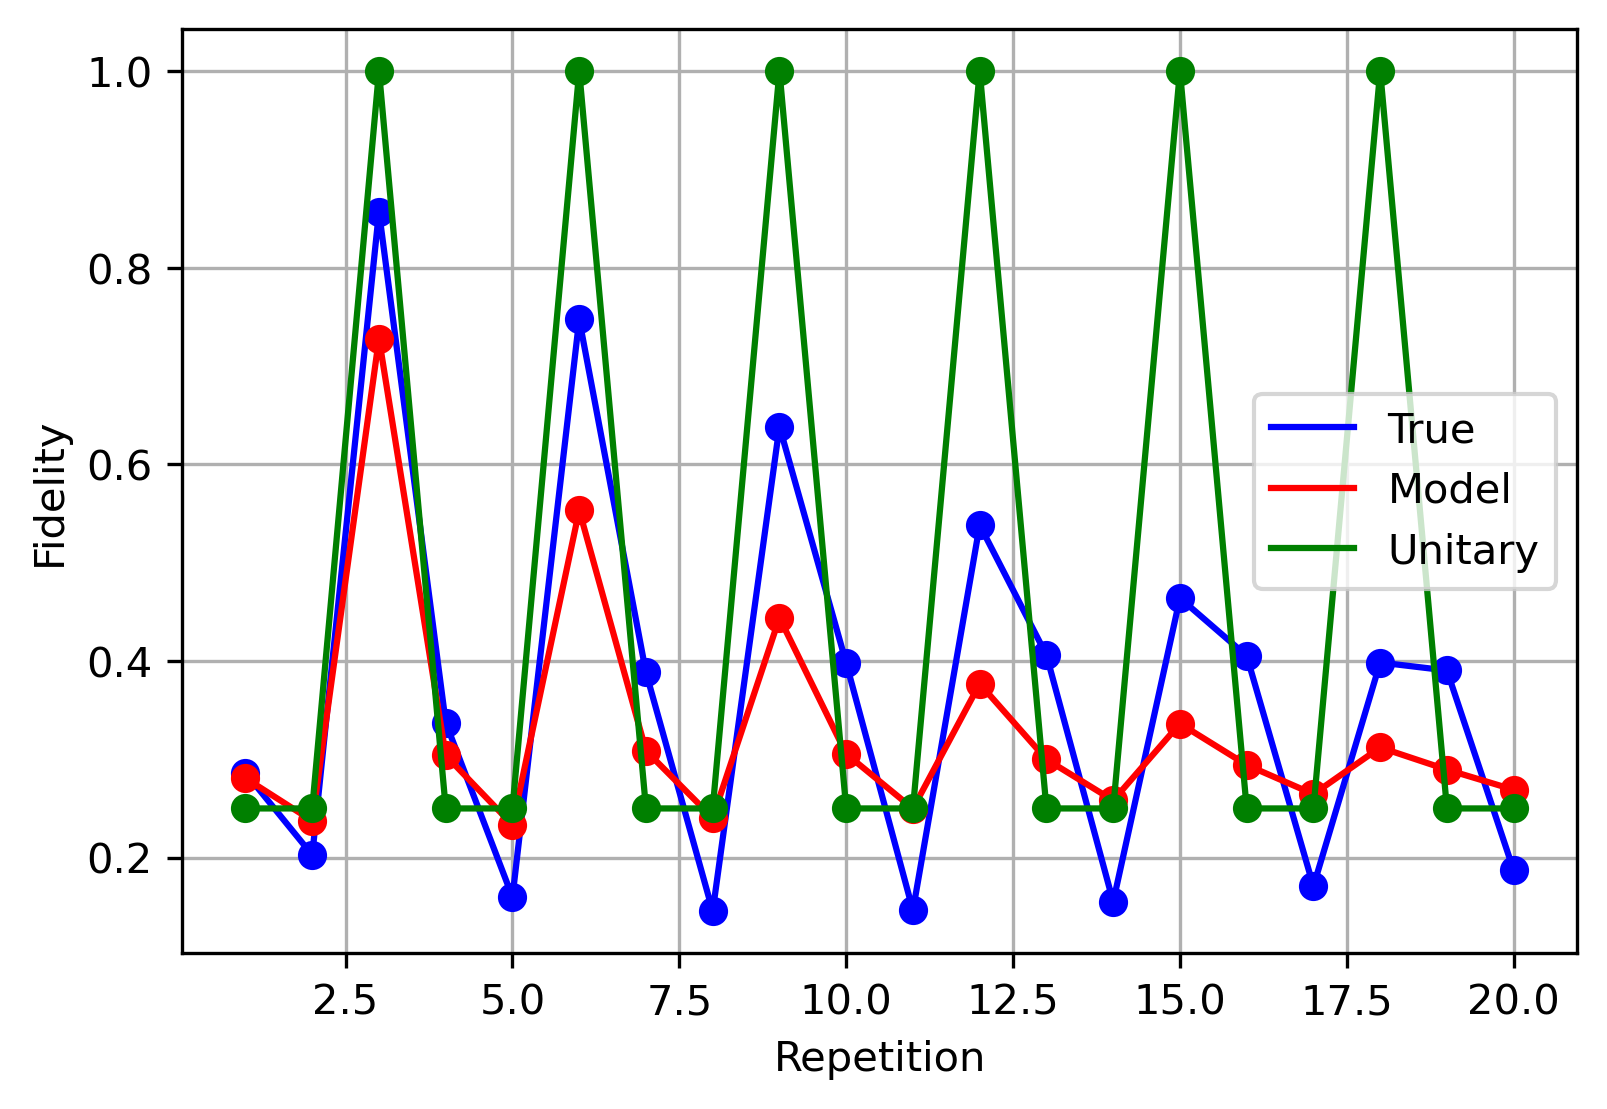

In [21]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, target_test, "b-",  label="True")
plt.plot(x, target_test, "bo")

plt.plot(x, model_expectation_list, "r-", label="Model")
plt.plot(x, model_expectation_list, "ro")

plt.plot(x, unitary_expectation_list, "g-", label="Unitary")
plt.plot(x, unitary_expectation_list, "go")
plt.xlabel("Repetition")
plt.ylabel("Fidelity")
plt.legend()
plt.grid()
plt.show()

## Three Qubit QFT

In [39]:
def qft(n):
    circuit = qk.QuantumCircuit(n)
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            circuit.cp(2*np.pi/2**(j-i+1), j, i)
            
    return circuit

In [40]:
print(qft(3))

     ┌───┐                                     
q_0: ┤ H ├─■────────■──────────────────────────
     └───┘ │P(π/2)  │       ┌───┐              
q_1: ──────■────────┼───────┤ H ├─■────────────
                    │P(π/4) └───┘ │P(π/2) ┌───┐
q_2: ───────────────■─────────────■───────┤ H ├
                                          └───┘


In [41]:
input_list, target_list = pickle.load(open("..\..\data\threeQubits_expectation_qft.p", "rb"))
input_list, input_val_list = input_list[:450], input_list[450:]
target_list, target_val_list = target_list[:450], target_list[450:]

n = 3
d = 2**n
rank = 7
np.random.seed(42)
random.seed(42)

circuit = qft(n)
U = Operator(circuit).data

kraus_model = KrausMap(U = U, c=0.9, d=d, rank=rank)

model3 = ModelQuantumMap(q_map = kraus_model,
                         cost = expectation_value_loss,
                         input_list = input_list,
                         target_list = target_list,
                         input_val_list = input_val_list,
                         target_val_list = target_val_list,
                         lr = 0.05, 
                         h = 1e-3)

In [ ]:
model3.train(num_iter = 1000, 
             use_adam = True,
             N = 10)

  0%|          | 0/1000 [00:00<?, ?it/s]

0: fid: 0.00882, c: 0.895
1: fid: 0.00864, c: 0.891
2: fid: 0.00840, c: 0.886
3: fid: 0.00820, c: 0.881
4: fid: 0.00801, c: 0.877
5: fid: 0.00781, c: 0.872
6: fid: 0.00761, c: 0.866
7: fid: 0.00743, c: 0.861
8: fid: 0.00725, c: 0.855
9: fid: 0.00708, c: 0.849
10: fid: 0.00693, c: 0.844
11: fid: 0.00678, c: 0.838
12: fid: 0.00664, c: 0.832
13: fid: 0.00653, c: 0.827
14: fid: 0.00643, c: 0.822
15: fid: 0.00633, c: 0.817
16: fid: 0.00624, c: 0.811
17: fid: 0.00614, c: 0.805
18: fid: 0.00603, c: 0.798
19: fid: 0.00594, c: 0.791
20: fid: 0.00585, c: 0.785
21: fid: 0.00576, c: 0.778
22: fid: 0.00568, c: 0.771
23: fid: 0.00561, c: 0.763
24: fid: 0.00556, c: 0.757
25: fid: 0.00552, c: 0.750
26: fid: 0.00550, c: 0.743
27: fid: 0.00548, c: 0.735
28: fid: 0.00547, c: 0.727
29: fid: 0.00546, c: 0.720


## One Qubit Error Correction

In [29]:
input_list, counts_list = pickle.load(open("..\..\data\oneQubits_expectation_error.p", "rb"))

In [30]:
counts_error = counts_list[-2:]

In [31]:
corr_mat = generate_corruption_matrix(1, counts_error)

In [32]:
target_list = []
for counts in counts_list[:18]:
    vec = counts_to_vector(counts, 1)
    vec = corr_mat@vec
    counts = vector_to_counts(vec, 1)
    target_list.append(expected_parity(counts))

In [33]:
n = 1
d = 2**n
rank = 3
np.random.seed(42)
random.seed(42)

circuit = qk.QuantumCircuit(1)
circuit.h(0)
U = Operator(circuit).data

kraus_model = KrausMap(U = U, c=0.9, d=d, rank=rank)

model = ModelQuantumMap(q_map = kraus_model,
                        cost = expectation_value_loss,
                        input_list = input_list,
                        target_list = target_list,
                        input_val_list = input_list,
                        target_val_list = target_list,
                        lr = 0.05, 
                        h = 1e-3)

In [35]:
model.train(num_iter = 200, 
            use_adam = True,
            N = 18)

  0%|          | 0/200 [00:00<?, ?it/s]

0: fid: 0.00079, c: 0.891
1: fid: 0.00079, c: 0.891
2: fid: 0.00079, c: 0.891
3: fid: 0.00079, c: 0.890
4: fid: 0.00079, c: 0.890
5: fid: 0.00079, c: 0.889
6: fid: 0.00079, c: 0.889
7: fid: 0.00079, c: 0.889
8: fid: 0.00079, c: 0.888
9: fid: 0.00079, c: 0.888
10: fid: 0.00079, c: 0.888
11: fid: 0.00079, c: 0.887
12: fid: 0.00079, c: 0.887
13: fid: 0.00079, c: 0.887
14: fid: 0.00079, c: 0.886
15: fid: 0.00079, c: 0.886
16: fid: 0.00079, c: 0.886
17: fid: 0.00079, c: 0.885
18: fid: 0.00078, c: 0.885
19: fid: 0.00078, c: 0.884
20: fid: 0.00078, c: 0.884
21: fid: 0.00078, c: 0.884
22: fid: 0.00078, c: 0.883
23: fid: 0.00078, c: 0.883
24: fid: 0.00078, c: 0.883
25: fid: 0.00078, c: 0.882
26: fid: 0.00078, c: 0.882
27: fid: 0.00078, c: 0.882
28: fid: 0.00078, c: 0.881
29: fid: 0.00078, c: 0.881
30: fid: 0.00078, c: 0.880
31: fid: 0.00078, c: 0.880
32: fid: 0.00078, c: 0.880
33: fid: 0.00078, c: 0.879
34: fid: 0.00078, c: 0.879
35: fid: 0.00078, c: 0.879
36: fid: 0.00078, c: 0.878
37: fid: 0.

In [36]:
target_test = []
for counts in counts_list[18:-2]:
    vec = counts_to_vector(counts, 1)
    vec = corr_mat@vec
    counts = vector_to_counts(vec, 1)
    target_test.append(counts["0"])

In [37]:
state_unitary = state_model = observ = np.array([[1, 0], [0, 0]])
model_expectation_list = []
unitary_expectation_list = []

for i in range(20):
    state_model = model.q_map.apply_map(state_model)
    model_expectation_list.append(expectation_value(state_model, observ))
    
    state_unitary = U@state_unitary@U.T.conj()
    unitary_expectation_list.append(expectation_value(state_unitary, observ))

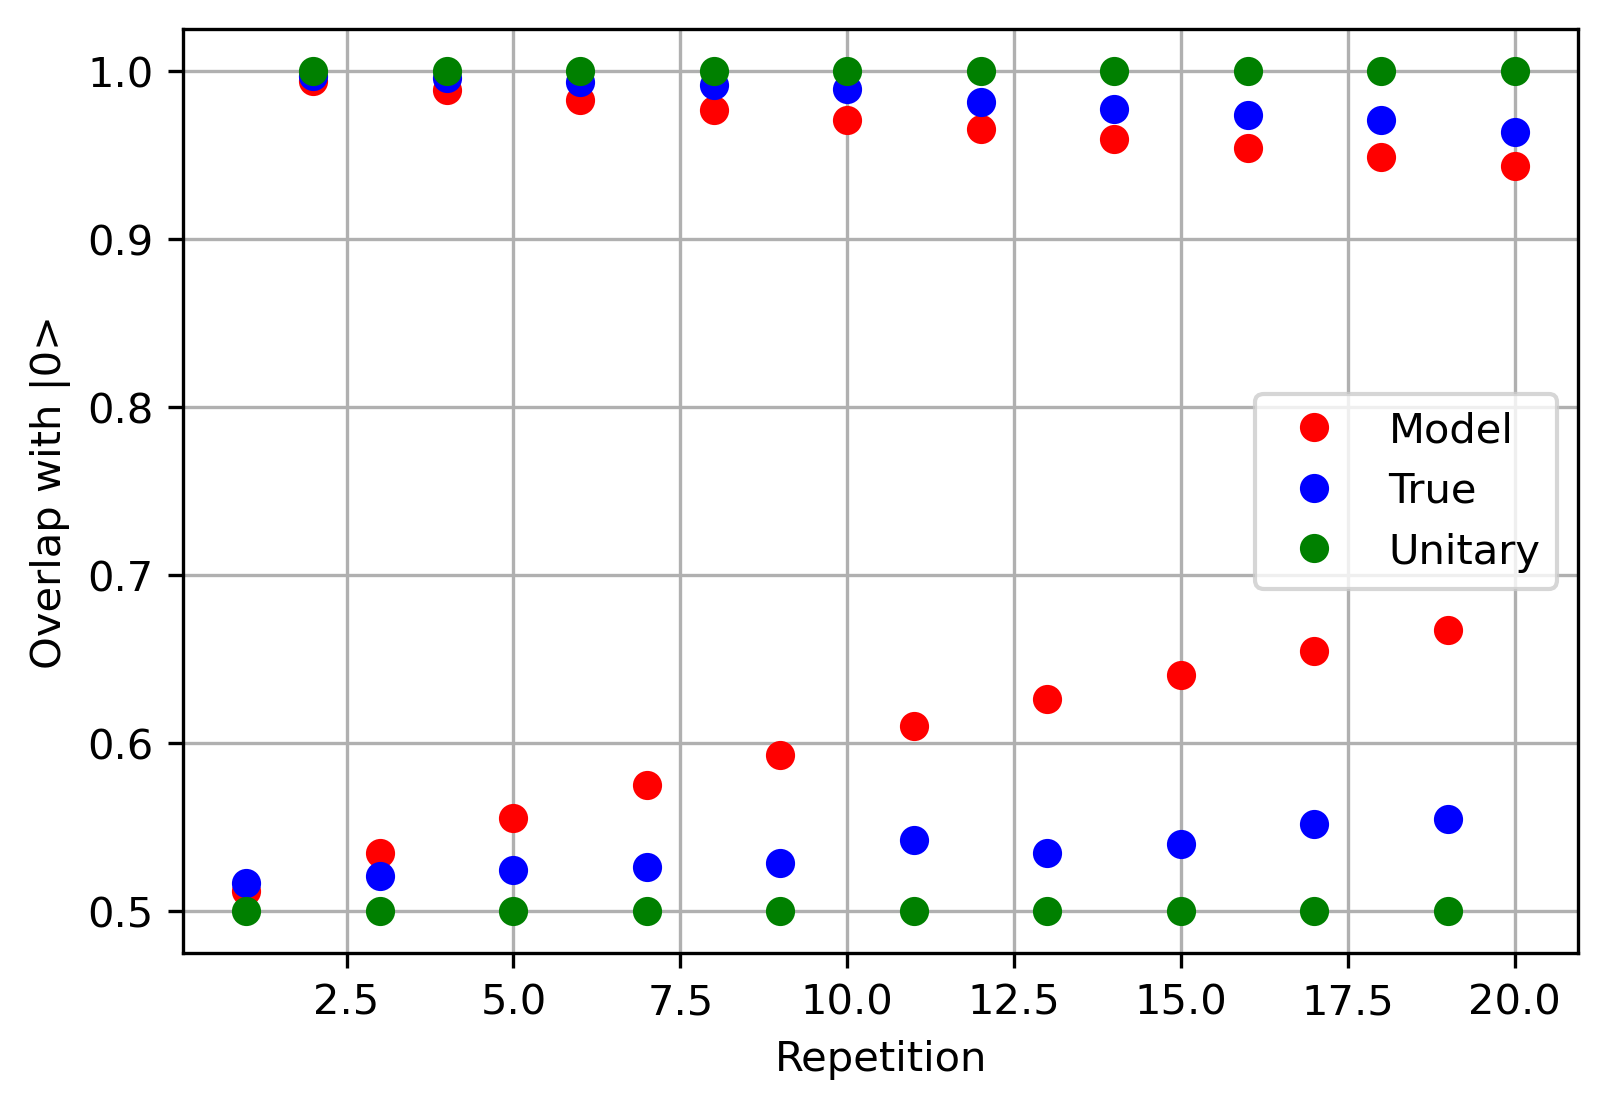

In [38]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
x = list(range(1,21))
plt.plot(x, model_expectation_list, "ro", label="Model")
plt.plot(x, target_test, "bo", label="True")
plt.plot(x, unitary_expectation_list, "go", label="Unitary")
plt.xlabel("Repetition")
plt.ylabel("Overlap with |0>")
plt.legend()
plt.grid()
plt.show()